In [5]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

df=pd.read_csv(r"C:\Users\ASUS\Documents\Ml_prs\datasets\car_evaluation.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:

# Step 4: Encode categorical data using pandas
# (Since all columns are categorical, convert each unique category into a number)
for col in df.columns:
    df[col] = df[col].astype('category').cat.codes
print("\n✅ Data After Encoding:\n")
print(df.head())


✅ Data After Encoding:

   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2      2
1      3        3  0    0      2    0      2
2      3        3  0    0      1    1      2
3      3        3  0    0      1    2      2
4      3        3  0    0      1    0      2


In [15]:

# Step 5: Split features (X) and target (y)
X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # last column (safety category)

# Step 6: Train-test split manually (80%-20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 5: Split features (X) and target (y)
X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # last column (safety category)

# Step 6: Train-test split manually (80%-20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Step 7: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict on test data
y_pred = model.predict(X_test)

# Step 9: Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
print("\n📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📊 Accuracy: 0.9624277456647399

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



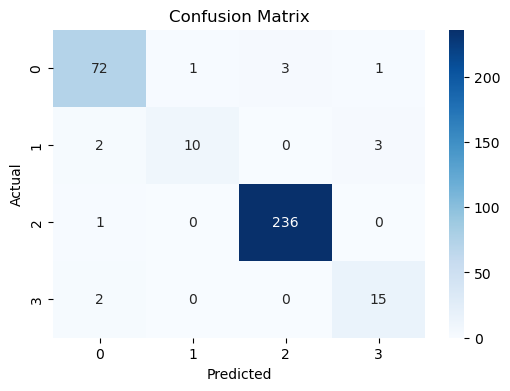

In [23]:
# Step 10: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


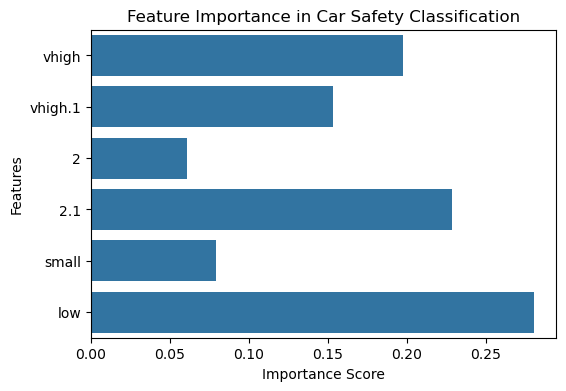

In [25]:
# Step 11: Feature Importance
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance in Car Safety Classification")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()